## Model

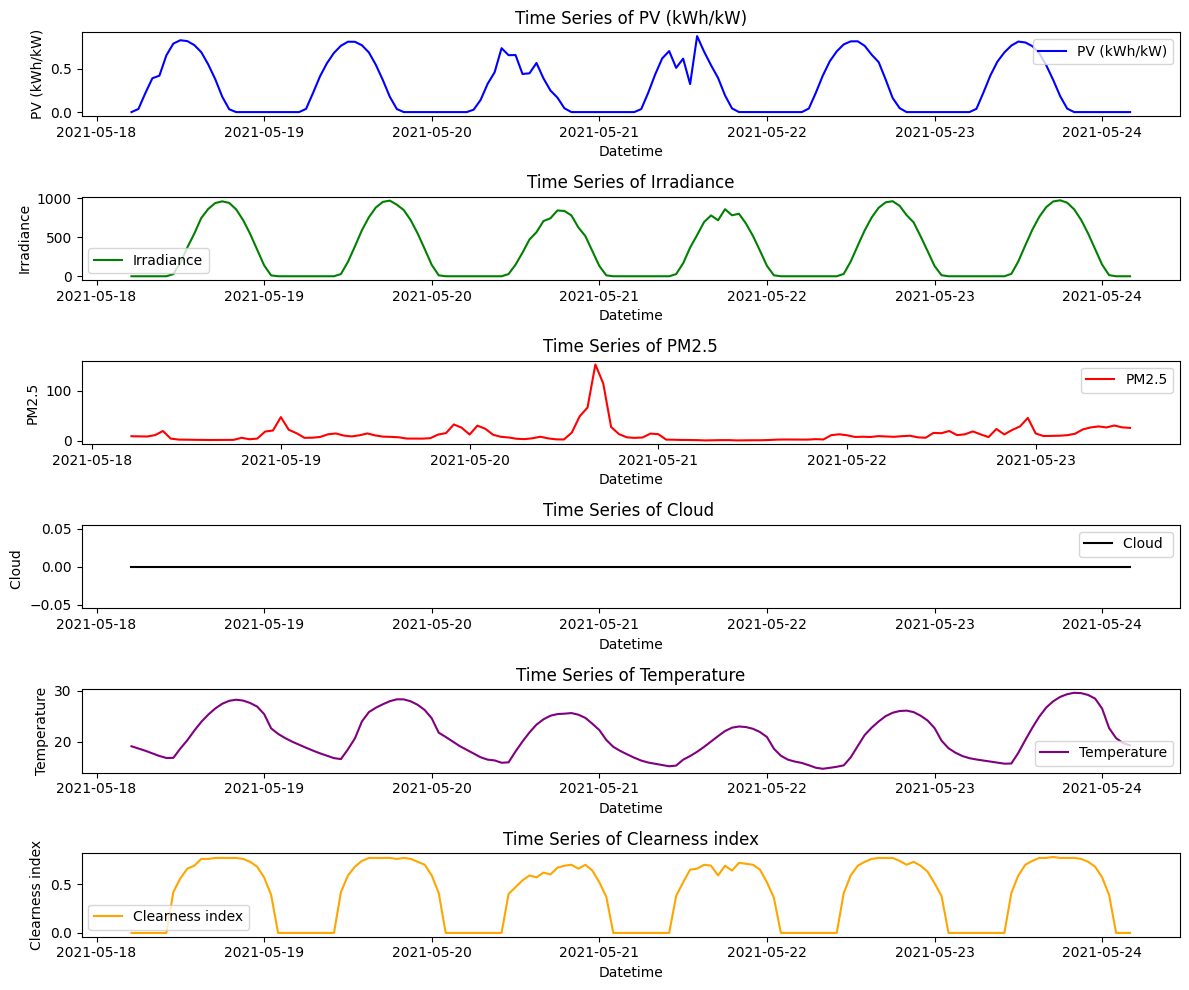

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

file_name = '19-05 Ilio.csv'
# Load the dataset
df = pd.read_csv(file_name)

# Define column names for ease of reference
pv = 'PV (kWh/kW)'
irr = 'Irradiance'
pm25 = 'PM2.5'
cloud = 'Cloud '
temp = 'Temperature'
KT = 'Clearness index'

# Convert 'Datetime' column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Plotting all time series in one figure
plt.figure(figsize=(12, 10))

# Helper function to create a subplot for a variable
def plot_time_series(index, series, label, color):
    plt.subplot(6, 1, index)
    plt.plot(df['Datetime'], series, label=label, color=color)
    plt.xlabel("Datetime")
    plt.ylabel(label)
    plt.title(f"Time Series of {label}")
    plt.legend()

# Plot each time series
plot_time_series(1, df[pv], pv, "blue")
plot_time_series(2, df[irr], irr, "green")
plot_time_series(3, df[pm25], pm25, "red")
plot_time_series(4, df[cloud], cloud, "black")
plot_time_series(5, df[temp], temp, "purple")
plot_time_series(6, df[KT], KT, "orange")  # Changed to plot KT series

plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset and drop rows with missing values
df = pd.read_csv(file_name).dropna(axis=0)

# Convert 'Datetime' column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Define your start and end dates
start_date = '2021-05-18'  # Replace with your start date
end_date = '2021-05-21'    # Replace with your end date

# Filter the dataframe to include only data within the specified date range
df = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)]

# Assuming 'pv' variable is defined elsewhere as the target variable name
target_variable = pv

# Drop the 'Datetime' column as it is not needed for the regression
df = df.drop(columns=['Datetime'])
#Drop O PV production
df = df[df[target_variable] != 0]

# Separate the target variable (PV INPUT) and features
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Drop the feature Irradiance
X = X.drop(columns=[irr])

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the linear regression model
model = LinearRegression().fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using Mean Squared Error (MSE) and R-squared metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.023300981509589133
R-squared: 0.6631296389828689


In [18]:
# Displaying the trained model weights
weights = pd.DataFrame({"Feature": X.columns, "Weight": model.coef_})
print("Intercept:", model.intercept_)
print(weights)

Intercept: 0.470651515151515
           Feature        Weight
0            PM2.5 -1.571530e-03
1           Cloud   2.775558e-16
2      Temperature -3.295473e-01
3  Clearness index  3.335181e-01
